<a href="https://colab.research.google.com/github/emmendezp/AIIA_ISI/blob/main/ISI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificacion  de imágenes con redes convolucionales**


**Integrantes:**
- Julio Javier Muñoz Quiñones
- Mario Anibal Bohorquez Mora
- Elkin Mauricio Mendez Pinzón

# 1.Comprensión del Negocio

- Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60 000 ejemplos y un conjunto de prueba de 10 000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta de 10 clases. Zalando tiene la intención de que Fashion-MNIST sirva como un reemplazo directo directo del conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático. Comparte el mismo tamaño de imagen y estructura de las divisiones de entrenamiento y prueba. 
https://www.kaggle.com/datasets/zalando-research/fashionmnist 
* Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas:
   
    - 0 camiseta/top
    - 1 pantalón
    - 2 jersey
    - 3 vestido
    - 4 abrigo
    - 5 Sandalia
    - 6 camisa
    - 7 zapatillas
    - 8 bolsa
    - 9 Botín


* De esta manera se puede usar el modelo para usar el dataset test  con los 10000 datos de prueba para observar conincidencias con respecto a los datos en el dataset train los cuales son 60000 a esto se le puede dar un enfoque en el sector de ventas en aplicaciones web en las cuales se observen coincidencias de las imagenes de ropa que carguen los usuarios con las categorias permitias "mencionadas anteriormente" en dicha aplicacion  mediante el entrenamiento y resultados se pueden observar posibles incosistencias en las imagenes  de ropa cargadas por parte de los usuarios. En este orden de idea planteamos un modelo de aprendizaje supervizado usando una  red convolucional la cual nos ayude con la clasificacion y procesamiento de imagenes 


* Aprendizaje supervisado 

  * El aprendizaje supervisado es un subconjunto del machine learning que consiste en la deducción de información a partir de datos de entrenamiento. Estos datos se clasifican en dos secciones: datos de entrenamiento y datos de prueba.

  * Los datos de entrenamiento se utilizan para entrenar a un modelo, y los datos de prueba son los que se usan para determinar la eficacia del modelo creado.

  * El objetivo del aprendizaje supervisado es crear un programa que sea capaz de resolver cualquier variable de entrada luego de ser sometido a un proceso de entrenamiento, En pocas palabras es aquel método que se refiere a la generación de modelos para predecir resultados basándose en ejemplos históricos de dichas variables.

* Importancia 

  * El aprendizaje supervisado ofrece soluciones para procesar y convertir datos en información real. Ayuda a las empresas a predecir situaciones de interés, haciéndoles saber qué decisiones son las que favorecen sus objetivos y, por el contrario, cuáles son las decisiones que les perjudica, Dicha virtud ofrece a las empresas una enorme ventaja sobre el resto de sus competidores, ya que tienen la capacidad de anticiparse a eventos no favorables y, por tanto, fácilmente evitables. Sabiendo esto, las organizaciones se concentran en aquellas situaciones que sí le otorgan beneficios considerables.

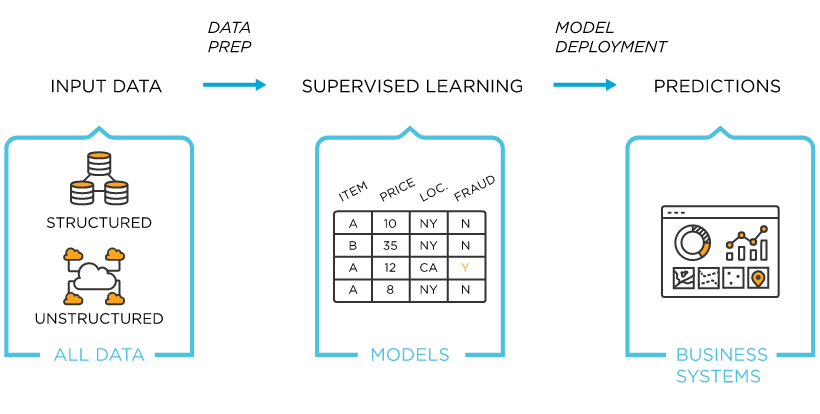

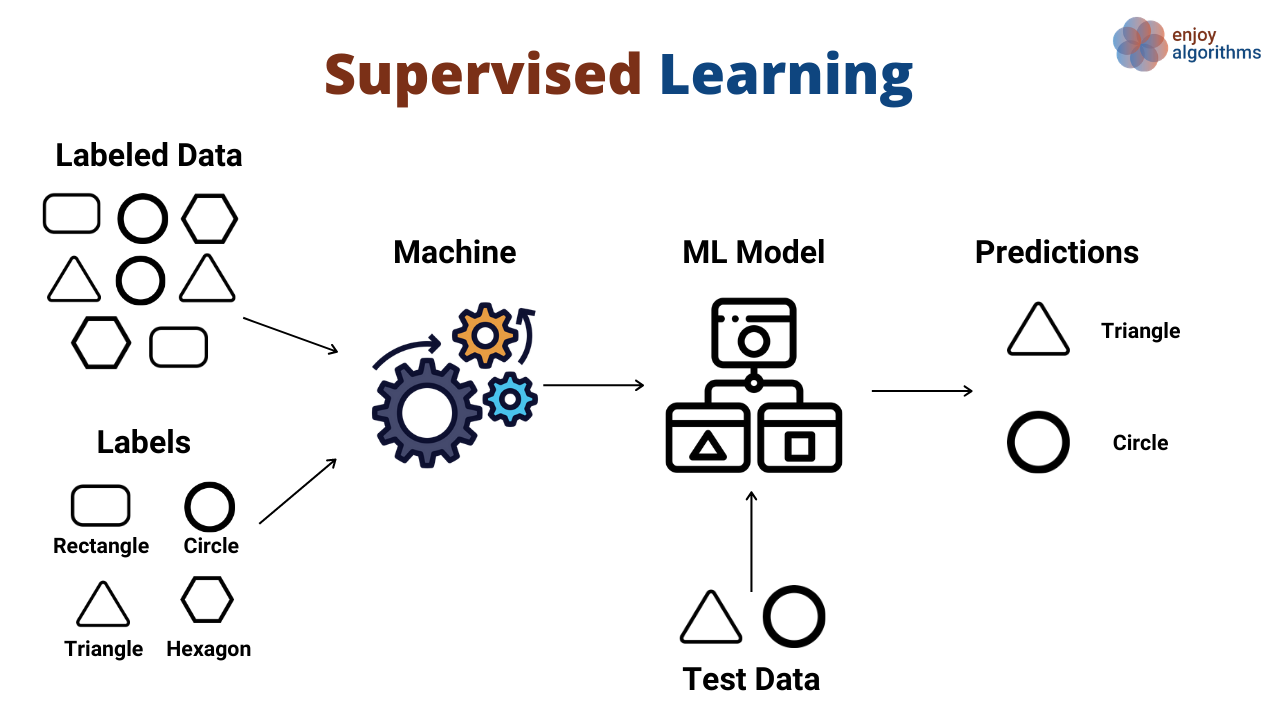

* convolutional neural networks(CNN)
  * Las Redes neuronales convolucionales son  un tipo de redes neuronales artificiales  donde las «neuronas»  corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico.  Este tipo de red es una variación de un perceptrón multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

  * **Como se logra que una red convolucional aprenda?**
  
    Las Redes neuronales Convolucionales, CNN  aprenden  a reconocer una diversidad de objetos dentro de imágenes , pero para ello necesitan «entrenarse» de previo con  una cantidad importante de «muestras»  -lease más de 10.000, de ésta forma las neuronas de la red van a poder captar las características únicas -de cada objeto- y a su vez, poder generalizarlo – a esto es lo que se le conoce como el proceso de «aprendizaje de un algoritmo » .   Nuestra red va a poder reconocer por ejemplo un cierto tipo de célula porque ya la ha «visto» anteriormente muchas veces, pero no solo buscará celulas semejantes sino que podrá inferir imagenes que no conozca pero que relaciona y en donde podrían existir similitudes ,  y esta es la parte inteligente del conocimiento

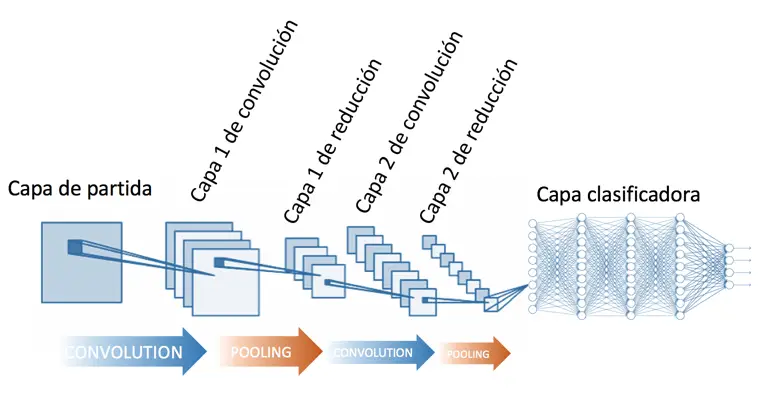

#2. Comprensión de los datos

* Para esta fase iniciaremos a explorar los datos con ayuda de algunas librerias disponibles en python.



In [1]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=4fb6b1f5d836091d7b91a31d061192adc0b48a45ea47b6e0b99a9910baa826a2
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [2]:
#librerias
import numpy as np
import pandas as pd
import seaborn as sns
from minisom import MiniSom
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
import concurrent.futures
import time   
from sklearn.model_selection import train_test_split
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,accuracy_score, ConfusionMatrixDisplay
%matplotlib inline

In [3]:
#conectar colab con drive
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [4]:
#importar csv's
link ='https://drive.google.com/file/d/1QzV3j_iTNVM05Tp9cS9wy36T9kr6xJtG/view?usp=sharing'
id = link.split("/")[-2]  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('fashion-mnist_train.csv')   

In [5]:
link = 'https://drive.google.com/file/d/1r6ccPz8ZC3NTl32SaUjmfwUTDwQp6yNk/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('fashion-mnist_test.csv')   

* Lectura de datos
  * A continuacion observamos la muestra de datos que contiene el cvs test, el cual contiene todas las columnas "pixel" de la 1 hasta la 784 con 5 columnas con sus respectivos valores , Este dataset está compuesto por 784 atributos (pixel) con 10000 registros

  * A continuacion observamos la muestra de datos que contiene el cvs train, el cual contiene todas las columnas "pixel" de la 1 hasta la 784 con 5 columnas con sus respectivos valores , Este dataset está compuesto por 784 atributos (pixel) con 60000 registros

In [6]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("El dataset tiene la siguiente dimensionalidad:", test.shape)

El dataset tiene la siguiente dimensionalidad: (10000, 785)


In [8]:
train = pd.read_csv('fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("El dataset tiene la siguiente dimensionalidad:", train.shape)

El dataset tiene la siguiente dimensionalidad: (60000, 785)


* Label
  * Es el la etiqueta de 0 a 4 el cual represanta una imagen separada "para el ejemplo mostrado **.heap** nos trae solo por primeros 5 datos"

* Pixel
  * Las columnas restantes son números de píxeles (784 en total), Cada valor es la oscuridad del píxel (1 a 255)

En las siguientes graficas observamos los datos de train y test  , dado que son homogeneos las barras del histograma son de igual longitud para todos casos " tengamos en cuenta que son 10 categorias y cada categoria tiene y cada categoria esta asociada a 6000 imagenes" 

In [10]:
new_train = train['label']
new_test = test['label']

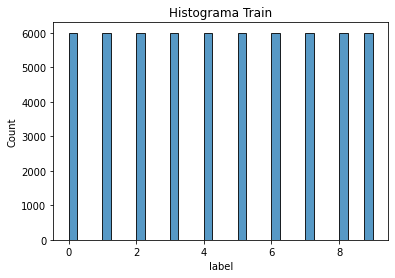

In [11]:
sns.histplot(train['label'] )
plt.title("Histograma Train")
plt.show()

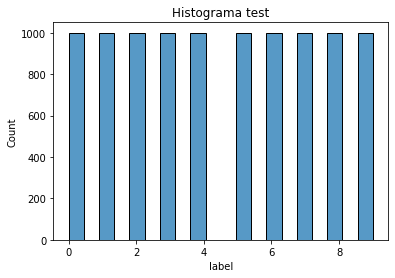

In [12]:
sns.histplot(test['label'] )
plt.title("Histograma test")
plt.show()

# 3. Preparacion de los datos


* Se crea el conjunto de datos final con el que vamos trabajar concatenando  los datos de test y train, para nuestro proyecto no es necesario realizar una depuracion de los datos dado que es necesaria la totalidad de ellos.

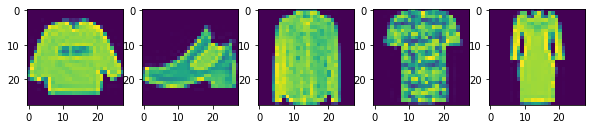

In [55]:
new_train = train.drop(columns=['label'])
new_test = test.drop(columns=['label'])
som_data = pd.concat([new_train, new_test], ignore_index=True).values
labels = pd.concat([train['label'], test['label']], ignore_index=True).values
f, ax = plt.subplots(1,5)
f.set_size_inches(10, 10)
for i in range(5):
    ax[i].imshow(som_data[i].reshape(28, 28))
plt.show()

* Ahora visualicemos algunas muestras después del cambio de tamaño de los datos que deben estar listos para entrenar la red. 

In [38]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')
test_labels = np.array(test.label)
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test=test_data[:,0]
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)


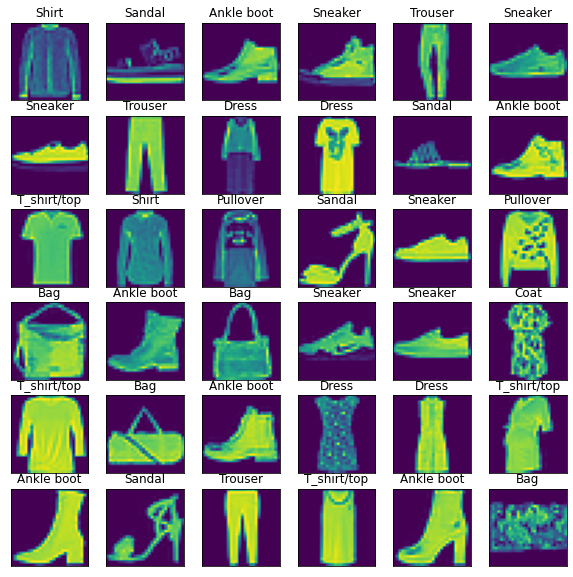

In [15]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


# 4. Modelado

* Que es el modelado ? 
  * El modelado de IA es la creación, formación e implementación de algoritmos de aprendizaje automático que emulan la toma de decisiones lógicas a partir de los datos disponibles.

* Etiquetas Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas, como se muestra a continuación:
  * 0 camiseta/top
  * 1 pantalón
  * 2 jersey
  * 3 vestido
  * 4 abrigo
  * 5 Sandalia
  * 6 camisa
  * 7 zapatillas
  * 8 bolsa
  * 9 Botín

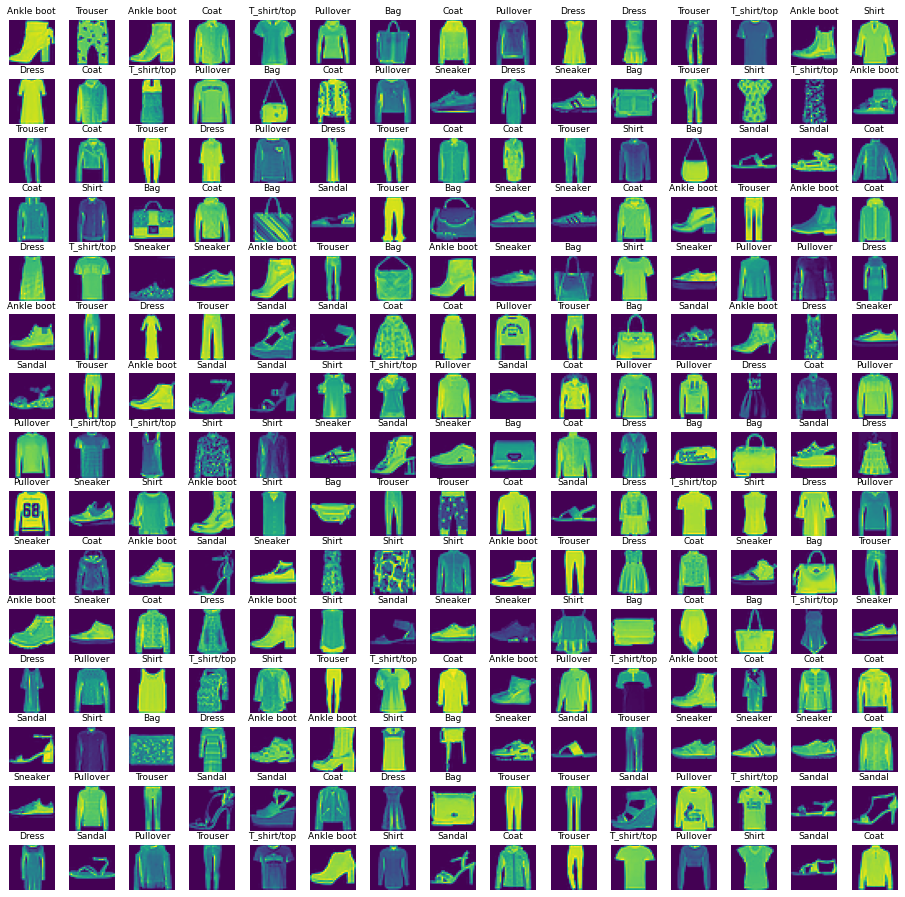

In [16]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel()
n_train = len(train_data)
for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_train)
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)



* En primer lugar debemos definor la forma de la imagen antes de definir nuestro modelo 

In [17]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [18]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

* La primera capa en la red modelo, keras.layers.Flatten, transforma el formato de las imágenes de una matriz bidimensional (de 28 por 28 píxeles) a una matriz unidimensional (de 28 * 28 = 784 píxeles). Esta capa desapila filas de píxeles en la imagen y los alinea y no tiene parámetros para aprender; solo reformatea los datos.

* Después de aplanar los píxeles, la red consta de una secuencia de dos capas keras.layers.Dense. Estas son capas neuronales densamente conectadas o totalmente conectadas. La primera capa Densa tiene 32 neuronas . La segunda (y última) capa es una capa softmax de 10 neuronas que devuelve una matriz de 10 puntuaciones de probabilidad que suman 1. Cada nodo contiene una puntuación que indica la probabilidad de que la imagen actual pertenezca a una de las 10 clases.

In [19]:
# creacion de la red convolucional
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), 
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

* Compilar el modelo

  * Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Estos se agregan durante el paso de compilación del modelo:

  * Función de pérdida: mide la precisión del modelo durante el entrenamiento. Desea minimizar esta función para "dirigir" el modelo en la dirección correcta. Aquí usaremos "**sparse_categorical_crossentropy**"
  * Optimizer: así es como se actualiza el modelo en función de los datos que ve y su función de pérdida.
  * Métricas: se utilizan para monitorear los pasos de capacitación y prueba. El siguiente ejemplo utiliza la precisión, la fracción de las imágenes que se clasifican correctamente.

In [20]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


* ¿Qué es FIT en Python?
El método fit se encarga de ajustar los parámetros de regresión lineal a los datos. Como vemos, la regresión lineal casi ha averiguado cómo hemos generado los datos

In [21]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=80,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/80
12/12 [==============================] - 21s 2s/step - loss: 1.7615 - accuracy: 0.4520 - val_loss: 1.1282 - val_accuracy: 0.6942
Epoch 2/80
12/12 [==============================] - 19s 2s/step - loss: 0.8847 - accuracy: 0.7288 - val_loss: 0.6909 - val_accuracy: 0.7563
Epoch 3/80
12/12 [==============================] - 19s 2s/step - loss: 0.6398 - accuracy: 0.7721 - val_loss: 0.5785 - val_accuracy: 0.7948
Epoch 4/80
12/12 [==============================] - 20s 2s/step - loss: 0.5549 - accuracy: 0.8045 - val_loss: 0.5180 - val_accuracy: 0.8150
Epoch 5/80
12/12 [==============================] - 20s 2s/step - loss: 0.5043 - accuracy: 0.8239 - val_loss: 0.4802 - val_accuracy: 0.8297
Epoch 6/80
12/12 [==============================] - 20s 2s/step - loss: 0.4743 - accuracy: 0.8330 - val_loss: 0.4498 - val_accuracy: 0.8433
Epoch 7/80
12/12 [==============================] - 20s 2s/step - loss: 0.4502 - accuracy: 0.8426 - val_loss: 0.4333 - val_accuracy: 0.8489
Epoch 8/80
12/12 [==

#5 Evaluacion del modelo

* Grafiquemos la precisión del entrenamiento frente a la pérdida para comprender mejor el entrenamiento del modelo.

In [39]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

Text(0.5, 1.0, 'Train - Accuracy')

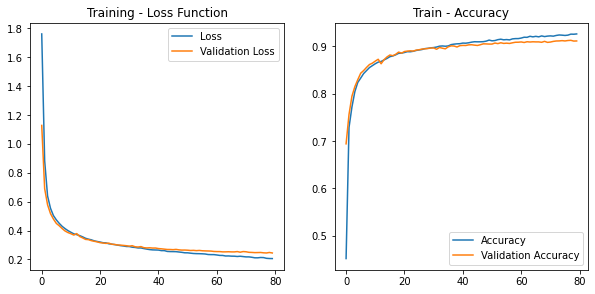

In [40]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [41]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2416
Test Accuracy : 0.9142


* De el entreanimeito observamos que loss: 0.2416- accuracy: 0.9142 

* Resultados

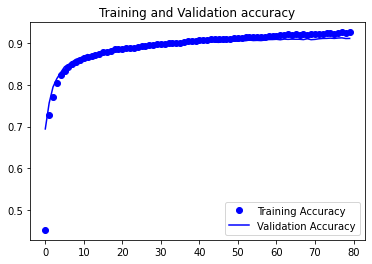

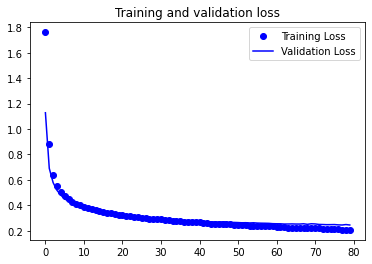

In [42]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

* Reporte de clasificación

In [43]:
predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)
y_true = test.iloc[:, 0]
correct = np.mean(predicted_classes==y_true)
incorrect = np.mean(predicted_classes!=y_true)

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.86      0.88      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.76      0.75      0.76      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



* Es evidente que nuestro clasificador tiene un rendimiento inferior al de la clase 0 en términos de precisión. Para la clase 2, al clasificador le falta un poco de precisión, mientras que le falta un poco de recuperación (es decir, se pierde) y tiene la precision mas baja de todas las class para la clase 6, finalmente observamos que la clase 1 tiene una recuperacion y precision bastante alta.

* Quizás obtendremos más información después de visualizar las predicciones correctas e incorrectas.

* Examinemos la etiqueta de prueba y verifiquemos si tiene la clasificación correcta o no.

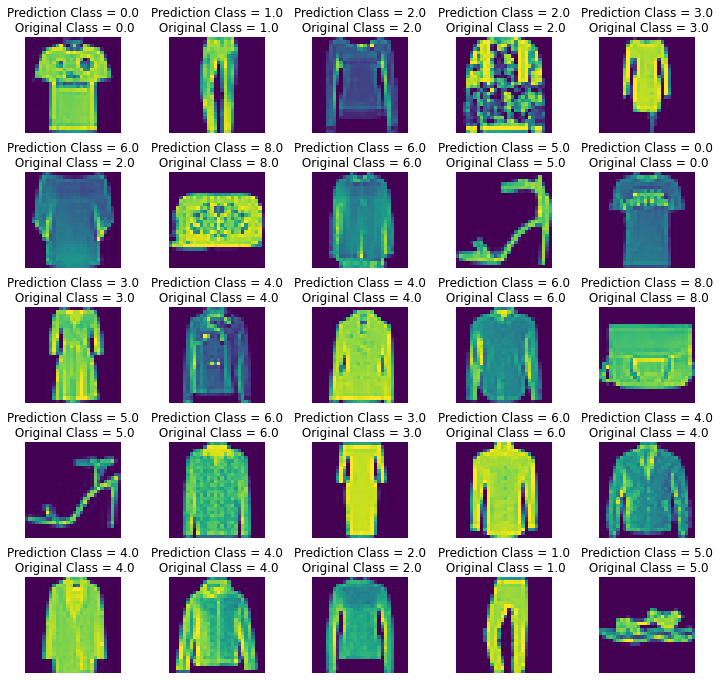

In [44]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

* Matriz de confusion 
  * Para esta matriz debemos tener en encuenta que la diagonal corresponden a los positivos "predicciones acertadas" y los demas valores corresponden a los negativos "predicciones erradas" 

  * cuando tenemos un clase seleccionada las demas diagonales pasan a ser verdaderos negativos  
  * si estamos parados en una clase y la prediccion o seleccion cae en otra clase diferente a esto le llamamos falsos positivos "sentido vertical"
  * si estamos parados en una clase y la prediccion o seleccion cae en otra clase diferente a esto le llamamos falsos negativos "sentido horizontal"


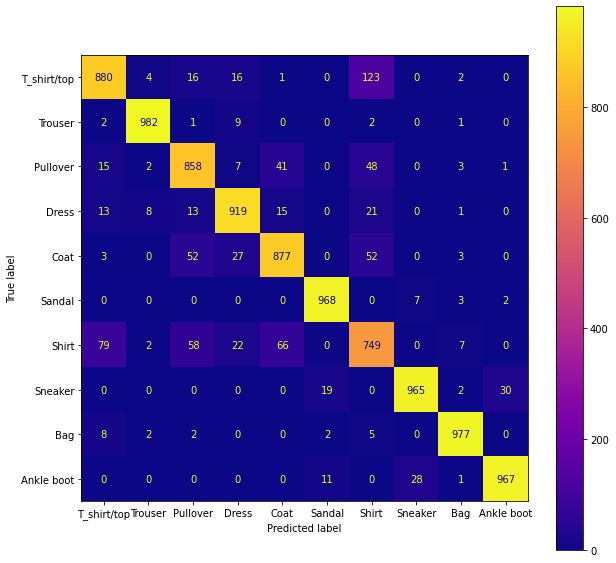

In [58]:
# Creating Confusion matrix
cm=confusion_matrix(predicted_classes ,test_labels)
# Ploting Confusion matrix 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'plasma');

#6. Conclusiones 
* Como se observo anteriormente cuando las imagenes de entrenamiento no son muy claras o no coinciden en gran manera con el dataset de test se obtiene una presicion inferior a la promedio en otro ejemplos como en la clase 6 tenemos una recuperacion "recall" al tener altas similitudes afectando asi el rendimiento de la clasifacion y en casos donde la imagen es mas estadar como en los pantalones tenemos un promedio casi del 100% lo cual nos indica que es muy efectivo , por otro lado los resultados pueden mejorar al aumentar la cantidad de epochs de esta manera entrenar de una forma mas exhaustiva generando mejores resultados , aun asi tenemos un promedio bastante aceptable para nuestro entrenamiento esto nos da a entender que al ponerlo en practica realmente prodriamos decargar imagenes que no pertenescan a las etiquetas planteadas .